In [1]:
import pandas as pd

# Garriga (2025) Dataset
The latest version is found on this website:
https://sites.google.com/site/carogarriga/cbi-data-1?authuser=0

The dataset used here is the **January 2025** version.

In [3]:
garriga_file_path = "../../../data/raw/CBI_2025_websiteGarriga.dta"
df_garriga = pd.read_stata(garriga_file_path)

In [4]:
df_garriga.head()

,year,cname,cowcode,ccodewb,creation,reform,direction,increase,decrease,regional,lvau_garriga,lvaw_garriga,cuk_ceo,cuk_obj,cuk_pol,cuk_limlen,lvaw_garriga_diff
0,1970,United States of America,2,840.0,0,0.0,0.0,0.0,0.0,0,0.391,0.475,0.438,0.4,0.1,0.626,0.377696
1,1971,United States of America,2,840.0,0,0.0,0.0,0.0,0.0,0,0.391,0.475,0.438,0.4,0.1,0.626,0.377696
2,1972,United States of America,2,840.0,0,0.0,0.0,0.0,0.0,0,0.391,0.475,0.438,0.4,0.1,0.626,0.371261
3,1973,United States of America,2,840.0,0,0.0,0.0,0.0,0.0,0,0.391,0.475,0.438,0.4,0.1,0.626,0.366913
4,1974,United States of America,2,840.0,0,0.0,0.0,0.0,0.0,0,0.391,0.475,0.438,0.4,0.1,0.626,0.364522


The Garriga dataset has two indices for central bank independence:
- Unweighted (`lvau_garriga`)
- Weighted (`lvaw_garriga`)
    - Personnel independence (0.2)
    - Central bank objectives (0.15)
    - Policy formulation independence (0.15)
    - Limits on central bank lending to the government (0.5)

Note that each of the above four components is calculated by a collection of variables, which are weighted in the calculation of the component (regardless of whether the component itself is weighted or not in the index).

# Romelli (2024)
The latest version can be found here: https://cbidata.org/

The dataset used here is the **2024** version.

In [5]:
romelli_file_path = "../../../data/raw/CBIData_Romelli_2025.dta"
df_romelli = pd.read_stata(romelli_file_path)

In [6]:
df_romelli.head()

,country,year,iso_a3,imf_country_code,cbie_index,cbie_index_ref,cbie_board,cbie_board_ref,cbie_board_q1,cbie_board_q2,...,cbie_finindep_q12,cbie_report,cbie_report_ref,cbie_report_q1,cbie_report_q2,cbie_gmt,cbie_cwn_lvau,cbie_cwn_lvaw,cbie_cwne,cbie_cbiconstitution
0,Afghanistan,2003,AFG,512.0,0.87,NaN,0.69,NaN,0.5,0.5,...,1,1.0,NaN,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
1,Afghanistan,2004,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
2,Afghanistan,2005,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
3,Afghanistan,2006,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
4,Afghanistan,2007,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0


# Comparison
Let's analyse the extent to which these indices agree.

Do this by computing the correlation between them.

## Merging datasets

In [12]:
# Rename Romelli country column -> cname to match Garriga
df_romelli = df_romelli.rename(columns={"country": "cname"})
df_romelli.head()

,cname,year,iso_a3,imf_country_code,cbie_index,cbie_index_ref,cbie_board,cbie_board_ref,cbie_board_q1,cbie_board_q2,...,cbie_finindep_q12,cbie_report,cbie_report_ref,cbie_report_q1,cbie_report_q2,cbie_gmt,cbie_cwn_lvau,cbie_cwn_lvaw,cbie_cwne,cbie_cbiconstitution
0,Afghanistan,2003,AFG,512.0,0.87,NaN,0.69,NaN,0.5,0.5,...,1,1.0,NaN,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
1,Afghanistan,2004,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
2,Afghanistan,2005,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
3,Afghanistan,2006,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
4,Afghanistan,2007,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0


In [26]:
# Merge the datasets on year and cname
df_merged = pd.merge(df_romelli, df_garriga, on=["year","cname"], how="inner")
df_merged.head()

,cname,year,iso_a3,imf_country_code,cbie_index,cbie_index_ref,cbie_board,cbie_board_ref,cbie_board_q1,cbie_board_q2,...,increase,decrease,regional,lvau_garriga,lvaw_garriga,cuk_ceo,cuk_obj,cuk_pol,cuk_limlen,lvaw_garriga_diff
0,Afghanistan,2003,AFG,512.0,0.87,NaN,0.69,NaN,0.5,0.5,...,1.0,0.0,0,0.746,0.808,0.645,0.4,1.0,0.937,0.424167
1,Afghanistan,2004,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,0.0,0.0,0,0.746,0.808,0.645,0.4,1.0,0.937,0.422633
2,Afghanistan,2005,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,0.0,0.0,0,0.746,0.808,0.645,0.4,1.0,0.937,0.422633
3,Afghanistan,2006,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,0.0,0.0,0,0.746,0.808,0.645,0.4,1.0,0.937,0.422633
4,Afghanistan,2007,AFG,512.0,0.87,0.0,0.69,0.0,0.5,0.5,...,0.0,0.0,0,0.746,0.808,0.645,0.4,1.0,0.937,0.426467


In [23]:
# Extract just for year 2020 (arbitrarily chosen)
year = 2020
df_merged_single_year = df_merged[df_merged["year"] == year]

## Calculate and visualise

### Trendlines

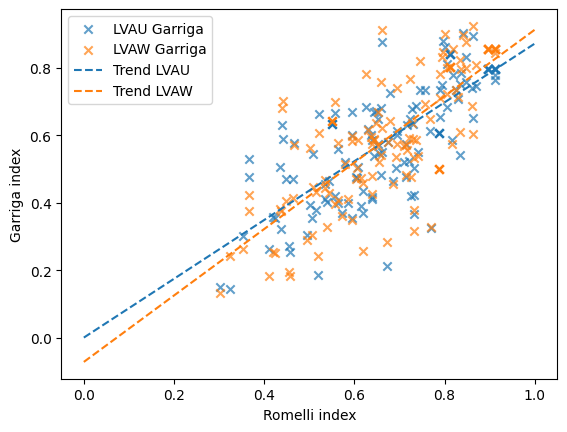

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plots
plt.scatter(df_merged_single_year["cbie_index"], df_merged_single_year["lvau_garriga"], label="LVAU Garriga", alpha=0.7, marker='x')
plt.scatter(df_merged_single_year["cbie_index"], df_merged_single_year["lvaw_garriga"], label="LVAW Garriga", alpha=0.7, marker='x')

# Fit trendlines
coef_lvau = np.polyfit(df_merged_single_year["cbie_index"], df_merged_single_year["lvau_garriga"], 1)
coef_lvaw = np.polyfit(df_merged_single_year["cbie_index"], df_merged_single_year["lvaw_garriga"], 1)

# Create x values for trendlines
x = np.linspace(0, 1, 100)

# Plot trendlines
plt.plot(x, coef_lvau[0]*x + coef_lvau[1], label="Trend LVAU", linestyle="--")
plt.plot(x, coef_lvaw[0]*x + coef_lvaw[1], label="Trend LVAW", linestyle="--")

# Labels and legend
plt.xlabel("Romelli index")
plt.ylabel("Garriga index")
plt.legend()
plt.show()

### Correlations

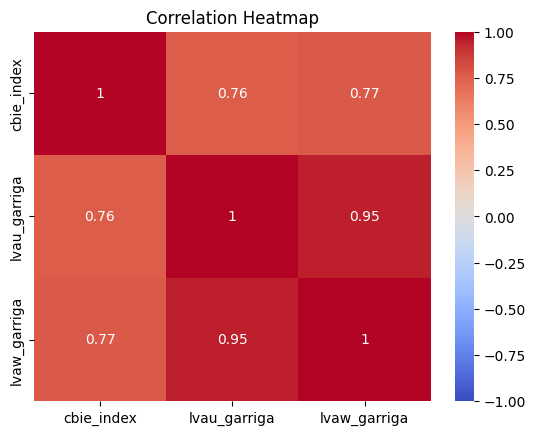

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_merged_single_year[["cbie_index", "lvau_garriga", "lvaw_garriga"]].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Conclusions
There is a fairly strong correlation between the Romelli and the Garriga indices for central bank independence.

Also there seems to be not much difference between using either the weighted or the unweighted Garriga index, given their very strong correlation.

It would be interesting to analyse on which countries do these indices disagree the most and the least.